In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import plotly.offline as offline
import plotly.graph_objs as go
import datetime
from scipy import stats

## Gather

Data source:

* CSV
* Programmatically download data from udacity url
* Twitter API

In [2]:
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)
folder = "image-predictions"

if not os.path.exists(folder):
    os.makedirs(folder)

with open(os.path.join(folder, url.split('/')[-1]), mode = "wb") as file:
    file.write(response.content)

os.listdir(folder)

img_predictions_data = pd.read_csv(folder + '/image-predictions.tsv', sep='\t')
img_predictions_data.head()

#The above code is due to the project requirement of using the requests library. Alternative is to simply pass 
#the url to pandas
#img_predictions_data = pd.read_csv(url, sep="\t")
#img_predictions_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
consumer_key = "URWgThS6vo3798dstyTpFBK5o"
consumer_secret = "mFixTrF7sizXX7enj83pl2EEG2A3K7NQqnBmrZx802MExD1can"
access_token = "1051803369101127680-iw3O3XipdDmNy9FVBsWJ75Vlr8VZ6i"
access_token_secret = "wbJ6BDnJPqZl1tuCwA2sQlvZXNQYQicLVAbgp33sxm5IK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [6]:
tweet_ids = list(df.tweet_id)

tweet_data = {}

for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except:
        print("Error for: "+ str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 771004394259247104
Error for: 770743923962707968


Rate limit reached. Sleeping for: 212


Error for: 754011816964026368
Error for: 669749430875258880


In [7]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [8]:
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    try:
        retweets = data[tweet_id]['retweet_count']
        favorites = data[tweet_id]['favorite_count']
        date_time = data[tweet_id]['created_at']
        df_list.append({'tweet_id': int(tweet_id),
                        'retweets': int(retweets),
                        'favorites': int(favorites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))

In [9]:
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites', 'date_time'])
tweets_df.sample(5)

,tweet_id,retweets,favorites,date_time
106,871166179821445120,5710,0,2017-06-04 00:46:17
1793,676897532954456065,771,2355,2015-12-15 22:52:02
1424,696894894812565505,731,2478,2016-02-09 03:14:25
317,833826103416520705,3734,16246,2017-02-20 23:50:09
766,776088319444877312,167,1971,2016-09-14 16:00:49


## Gather Summary:

#### Obtaining data

* Getting data from an existing file (twitter-archive-enhanced.csv) Reading from csv file using pandas
* Downloading a file from the internet (image-predictions.tsv) Downloading file using requests
* Querying an API (tweet_json.txt) Get JSON object of all the tweet_ids using Tweepy
* Rate limit was reached twice when querying the API.
* Wait_on_rate_limit automatically wait for rate limits to replenish
* The number of IDs is 2340, there were 16 errors.

## Assess

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues will be our newt step. We will detect and document at quality issues and tidiness issues.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
img_predictions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 4 columns):
tweet_id     2340 non-null int64
retweets     2340 non-null int64
favorites    2340 non-null int64
date_time    2340 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 73.2 KB


In [13]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
img_predictions_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
tweets_df.describe()

,tweet_id,retweets,favorites
count,2.340000e+03,2340.000000,2340.000000
mean,7.422399e+17,2963.404274,8021.861111
std,6.833427e+16,4973.012846,12381.250582
min,6.660209e+17,0.000000,0.000000
25%,6.783704e+17,595.750000,1391.250000
50%,7.186224e+17,1386.000000,3496.500000
75%,7.986989e+17,3453.750000,9841.500000
max,8.924206e+17,84397.000000,165088.000000


In [16]:
df.name.value_counts().head()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Name: name, dtype: int64

In [17]:
df.rating_numerator.value_counts().head()

12    558
11    464
10    461
13    351
9     158
Name: rating_numerator, dtype: int64

In [18]:
df.rating_denominator.value_counts().head()

10    2333
11       3
50       3
80       2
20       2
Name: rating_denominator, dtype: int64

In [24]:
# view number of entries from each source
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [31]:
#find tweets where no name is provided (by filtering the name column where all letters are lowercase)
df.loc[(df['name'].str.islower())].tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [32]:
# For names with lowercase data, check if the worlds 'name is ..' is available in the corresponding text column
df.loc[(df['name'].str.islower()) & (df['text'].str.contains('name is'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None


In [34]:
# rows where there are no images
sum(df['expanded_urls'].isnull())

59

In [35]:
# Check if the same image url has been posted more than once(retweets).
img_predictions_data.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

In [36]:
df.expanded_urls.duplicated().value_counts()

False    2219
True      137
Name: expanded_urls, dtype: int64

In [39]:
all_columns = pd.Series(list(df) + list(img_predictions_data) + list(tweets_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [46]:
#check if tweets df has duplicated values
tweets_df.tweet_id.duplicated().value_counts()

False    2340
Name: tweet_id, dtype: int64

## Quality

#### df table

* The data contains retweets, and we only want the original ratings that have images
* Names column contains invalid values
* retweeted_status_timestamp, timestamp should be datetime instead of object (string)
* The numerator and denominator columns have invalid value
* In several columns null objects are non-null (None to NaN)
* tweet_id is int, in_reply_to_status_id is float, in_reply_to_user_id is float, retweeted_status_id is float, and dog stages are str

#### img_predictions_data

* tweet_id is int in img_predictions_df
* Missing values from images dataset (2075 rows instead of 2356)
* Some tweets have the same jpg_url

#### tweets_df

* Convert data type in 'id' column from integer to string.

The below issues were addressed at the time of obtaining the data

* retweets and favorites are float : converted to int
* 'id' column was renamed to "tweet_id" to match the other tables

-----

### Tidiness

#### df table

* Remove the retweets, so that only the original ratings that have images are included
* Identify invalid names and convert to NaN
* Convert values in tweet_id from int to string
* Melt dog stage column into a single column
* Remove the unneccesary columns and keep only the following columns for analysis: 'tweet_id', 'time_stamp', 'rating_numerator', 'rating_denominator', 'name', 'date', 'time', 'stage'.

#### img_predictions_data

* Remove the unneccesary columns and keep only the following columns for analysis: 'tweet_id', 'jpg_url', 'img_num', 'predictions', 'odds'.
* Simplify the table by keeping only one prediction, according to the odds priority order is as p1 > p2 > p3

----
* Merge all the three tables based on the tweet_id

## Cleaning Data

In [74]:
df_clean = df.copy()
img_predictions_data_clean = img_predictions_data.copy()
tweets_df_clean = tweets_df.copy()

### df table

#### Define

Keep only original ratings (without retweets) by removing rows of which the values in 'retweeted_status_id' column is not null.

In [58]:
#code
df_clean.drop(df_clean[df_clean.retweeted_status_id == df_clean.retweeted_status_id].index, inplace=True)

#### Test

In [75]:
# randomly print out 5 rows for visualization
# the retweets should be removed, thus the column contains only NA values
df_clean.query('retweeted_status_id != retweeted_status_id').sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2309,666804364988780544,NaN,NaN,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,None,None,None,None
2283,667200525029539841,NaN,NaN,2015-11-19 04:39:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Joshwa. He is a fuckboy supreme. He cl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667200525...,11,10,Joshwa,None,None,None,None
999,748220828303695873,NaN,NaN,2016-06-29 18:25:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Stop what you're doing and watch this heckin m...,NaN,NaN,NaN,https://vine.co/v/iiLjKuYJpr6,13,10,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
2218,668507509523615744,NaN,NaN,2015-11-22 19:13:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Birmingham Quagmire named Chuk. Love...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668507509...,10,10,a,None,None,None,None


#### Define

Correct invalid values in the 'name' column

In [76]:
#code
df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [77]:
#function to replace invalid names with np.nan
for name in df_clean.name:
    if name.islower():
        df_clean.name.replace(name, np.nan, inplace=True)

## also convert 'None' to np.nan

df_clean.name = df_clean.name.apply(lambda x: x if x != 'None' else np.nan)

#test
df_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooey',

#### Define

Convert values in timestamp column to datetime format

In [78]:
#code
df_clean.timestamp = pd.to_datetime(df.timestamp)

In [79]:
#test
type(df_clean.timestamp.values[1])

numpy.datetime64

#### Define

Obtain the rating numnerator from 'text' column

In [82]:
#code
df_clean['rating_numerator'] = df_clean.text.str.extract(".*\s(\d+)\/\d+.*", expand = True)

# test: check if the value in the rating numberator column is the same as in text column
(df_clean.rating_numerator == df_clean.text.str.extract(".*\s(\d+)\/\d+.*", expand=False)).any()

True

#### Define

Convert rating numerator and denominator columns as float

In [84]:
#code
df_clean.rating_numerator = df_clean.rating_numerator.astype(float)
df_clean.rating_denominator = df_clean.rating_denominator.astype(float)

In [85]:
#test
(df_clean.rating_numerator.dtype, df_clean.rating_denominator.dtype)

(dtype('float64'), dtype('float64'))

#### Define

Melt dogs stages into a single columns 'stage'

In [99]:
#code
stage = pd.melt(df_clean, id_vars=['tweet_id'], value_vars=['doggo', 'floofer', 'pupper', 'puppo'])

stage_list = []

for ids in stage.tweet_id.unique():
    stage_list.append(stage.query('tweet_id == @ids').value.tolist())

In [105]:
stage_list2 = []
for e in stage_list:
    stage_list2.append(list(set(e)))

In [106]:
# remove the 'None' in stage list which contains any stage value, such as 'doggo', 'floofer', "pupper", "puppo"
stage_list3 = []
for e in stage_list2:
    if len(e) > 1:
        e.remove('None')
        stage_list3.append(e)
    else:
        stage_list3.append(e)

In [107]:
# remove '[]' which wrapped outside the stage value
stage_list4 = []
for e in stage_list3:
    if len(e) > 1:
        stage_list4.append(",".join(e))
    else:
        stage_list4.append(e[0])

In [108]:
df_clean['stage'] = stage_list4

#test
df_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
971,750101899009982464,NaN,NaN,2016-07-04 23:00:03,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lilah. She agreed on one quick pic. Now s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750101899...,11.0,10.0,Lilah,None,None,None,None,None
2251,667806454573760512,NaN,NaN,2015-11-20 20:47:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Filup. He is overcome with joy after f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667806454...,10.0,10.0,Filup,None,None,None,None,None
2222,668466899341221888,NaN,NaN,2015-11-22 16:31:42,"<a href=""http://twitter.com/download/iphone"" r...",Here is a mother dog caring for her pups. Snaz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668466899...,4.0,10.0,NaN,None,None,None,None,None
448,819006400881917954,NaN,NaN,2017-01-11 02:21:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Sunny. She was also a very good First ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819006400...,14.0,10.0,Sunny,doggo,None,None,None,doggo
1088,737826014890496000,NaN,NaN,2016-06-01 02:00:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Remy. He has some long ass ears (proba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737826014...,10.0,10.0,Remy,None,None,None,None,None


In [109]:
# converrt 'None' in stage to NA

df_clean.stage = df_clean.stage.replace('None', np.nan)
df_clean.stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

#### Define

Convert tweet_id from int to string

#### Code

In [110]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)
df_clean.tweet_id.dtype

dtype('O')

#### Define

Remove unnecessary columns from the table

In [115]:
df_clean = df_clean.drop(columns = [
    'in_reply_to_status_id',
    'in_reply_to_user_id',
    'source',
    'text',
    'retweeted_status_id',
    'retweeted_status_user_id',
    'retweeted_status_timestamp',
    'expanded_urls',
    'doggo',
    'floofer',
    'pupper',
    'puppo',
    'timestamp' 
])

In [130]:
df_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,stage
0,892420643555336193,13.0,10.0,Phineas,NaN
1,892177421306343426,13.0,10.0,Tilly,NaN
2,891815181378084864,12.0,10.0,Archie,NaN
3,891689557279858688,13.0,10.0,Darla,NaN
4,891327558926688256,12.0,10.0,Franklin,NaN


### img_predictions_data table

#### Define

Remove rows with duplicate url values

In [117]:
img_predictions_data_clean = img_predictions_data_clean.drop_duplicates('jpg_url')

In [119]:
sum(img_predictions_data_clean.jpg_url.duplicated())

0

#### Define

Keep only one prediction (as per the priority order p1 > p2 > p3)

In [120]:
# Code

predictions = []
conf = []

def predict(data):
    if data.p1_dog == True:
        predictions.append(data.p1)
        conf.append(data.p1_conf)
    elif data.p2_dog == True:
        predictions.append(data.p2)
        conf.append(data.p2_conf)
    elif data.p3_dog == True:
        predictions.append(data.p3)
        conf.append(data.p3_conf)
    else:
        predictions.append(np.nan)
        conf.append(0)

img_predictions_data_clean.apply(predict, axis=1)
img_predictions_data_clean['predictions'] = predictions
img_predictions_data_clean['conf'] = conf

In [121]:
#Test
img_predictions_data_clean.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predictions,conf
1088,718971898235854848,https://pbs.twimg.com/media/CfpNGTHUIAAA8XC.jpg,1,golden_retriever,0.140394,True,Saint_Bernard,0.118769,True,Labrador_retriever,0.075492,True,golden_retriever,0.140394
756,688519176466644993,https://pbs.twimg.com/media/CY4ciRFUMAAovos.jpg,1,Pembroke,0.696372,True,Cardigan,0.121052,True,Shetland_sheepdog,0.050592,True,Pembroke,0.696372
2027,882268110199369728,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,golden_retriever,0.762211,True,Labrador_retriever,0.098985,True,cocker_spaniel,0.017199,True,golden_retriever,0.762211


#### Define

Convert tweet_id to string

In [122]:
#code
img_predictions_data_clean.tweet_id = img_predictions_data_clean.tweet_id.astype(str)

#Test
img_predictions_data_clean.tweet_id.dtype

dtype('O')

#### Define

Drop the unncessary columns

In [123]:
#Code
img_predictions_data_clean = img_predictions_data_clean.drop(columns=[
    'p1',
    'p1_conf',
    'p1_dog',
    'p2',
    'p2_conf',
    'p2_dog',
    'p3',
    'p3_conf',
    'p3_dog'
])

#Test
img_predictions_data_clean.head()

,tweet_id,jpg_url,img_num,predictions,conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### tweets_df_clean table

#### Define

Convert tweet_id from int to string

In [124]:
tweets_df_clean.tweet_id = tweets_df_clean.tweet_id.astype(str)

tweets_df_clean.tweet_id.dtype

dtype('O')

In [125]:
tweets_df_clean.head()

,tweet_id,retweets,favorites,date_time
0,892420643555336193,8409,38300,2017-08-01 16:23:56
1,892177421306343426,6200,32830,2017-08-01 00:17:27
2,891815181378084864,4100,24731,2017-07-31 00:18:03
3,891689557279858688,8537,41642,2017-07-30 15:58:51
4,891327558926688256,9257,39821,2017-07-29 16:00:24


#### Define

Merge all 3 tables

In [155]:
# Code

master_df = pd.merge(pd.merge(df_clean, img_predictions_data_clean, on='tweet_id'), tweets_df_clean, on = 'tweet_id')

master_df.head()

,tweet_id,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,predictions,conf,retweets,favorites,date_time
0,892420643555336193,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,0.000000,8409,38300,2017-08-01 16:23:56
1,892177421306343426,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6200,32830,2017-08-01 00:17:27
2,891815181378084864,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4100,24731,2017-07-31 00:18:03
3,891689557279858688,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086,8537,41642,2017-07-30 15:58:51
4,891327558926688256,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,9257,39821,2017-07-29 16:00:24


## Data Visualization

In [156]:
#export master_df to csv
master_df.to_csv("twitter_archive_master.csv", index=False, encoding='utf-8')

In [157]:
master_df['rating'] = master_df.rating_numerator/master_df.rating_denominator

### Scatterplot matrix

In [158]:
#extract the dog's stages
classes = list(set(master_df['stage'].values))
classes

[nan,
 'doggo,puppo',
 'doggo,floofer',
 'doggo,pupper',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [159]:
#The stage associated to the eight data variables is intended 
#to illustrate the patterns of the relationship between pairs of variables for each class.

class_code = {classes[k]: k for k in range(8)}
class_code

{nan: 0,
 'doggo,puppo': 1,
 'doggo,floofer': 2,
 'doggo,pupper': 3,
 'doggo': 4,
 'floofer': 5,
 'pupper': 6,
 'puppo': 7}

In [160]:
#The points displayed are colored according to their stage:
color_vals=[class_code[cl] for cl in master_df['stage']]

In [161]:
#Define a discrete colorscale
pl_colorscale=[[0.0, '#19d3f3'],
               [0.333, '#19d3f3'],
               [0.333, '#e763fa'],
               [0.666, '#e763fa'],
               [0.666, '#636efa'],
               [1, '#636efa']]

In [162]:
text=[master_df.loc[k, 'stage'] for k in range(len(master_df))]

In [163]:
trace1 = go.Splom(dimensions=[dict(label = 'rating_numerator',
                                  values = master_df.rating_numerator),
                              dict(label = 'rating_denominator',
                                  values = master_df.rating_denominator),
                              dict(label = 'conf',
                                  values = master_df.conf),
                              dict(label = 'favorite_count',
                                  values = master_df.favorites),
                              dict(label = 'retweets_count',
                                  values = master_df.retweets),
                              dict(label = 'ratings',
                                  values = master_df.rating)],
                 text = text,
                 marker = dict(color = color_vals,
                               size = 7,
                               colorscale = pl_colorscale,
                               showscale = False,
                               line = dict(width = 0.5,
                                           color = 'rgb(230, 230, 230)'))
                 )

In [178]:
axis = dict(showline=True,
          zeroline=False,
          gridcolor='#fff',
          ticklen=4)

layout = go.Layout(
    title='Sactterplot Matrix : We Rate Dogs',
    dragmode='select',
    width=1200,
    height=900,
    autosize=False,
    hovermode='closest',
    plot_bgcolor='rgba(240,240,240, 0.95)',
    xaxis1=dict(axis),
    xaxis2=dict(axis),
    xaxis3=dict(axis),
    xaxis4=dict(axis),
    xaxis5=dict(axis),
    xaxis6=dict(axis),
    xaxis7=dict(axis),
    yaxis1=dict(axis),
    yaxis2=dict(axis),
    yaxis3=dict(axis),
    yaxis4=dict(axis),
    yaxis5=dict(axis),
    yaxis6=dict(axis),
    yaxis7=dict(axis),
    font=dict(family='Roboto Condensed', size=12, color='#7f7f7f')
)

fig1 = dict(data=[trace1], layout=layout)

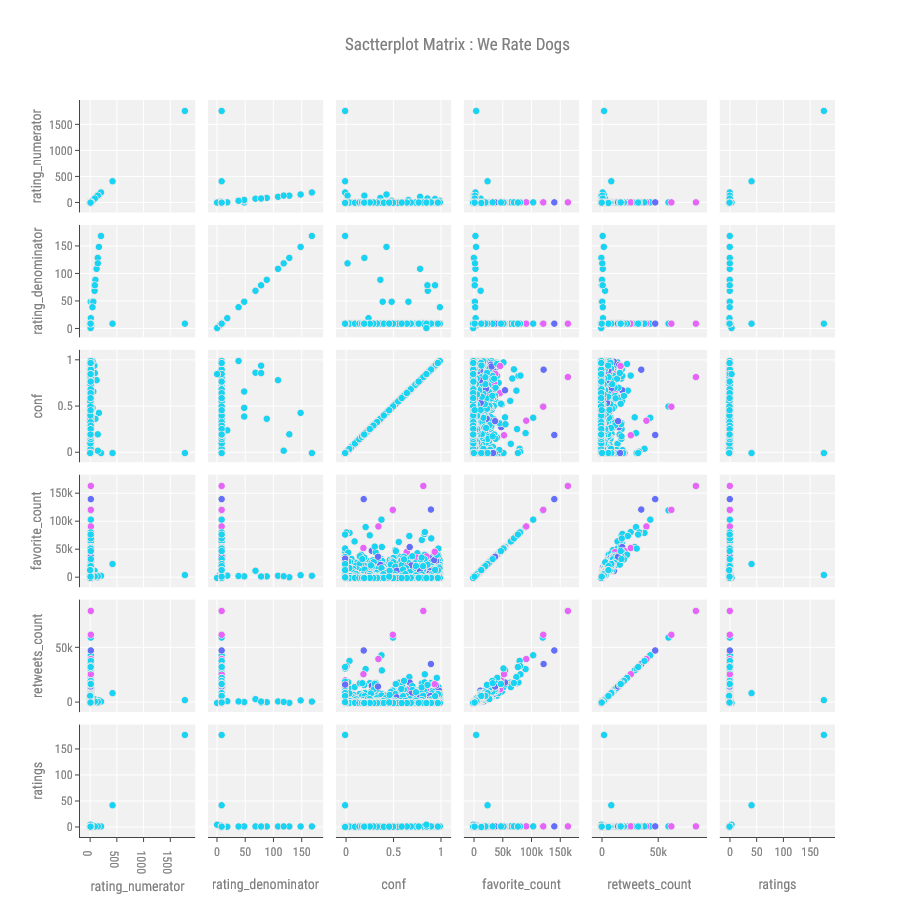

In [185]:
offline.iplot(fig1)

### Retweet count and favorties_count

In [198]:
trace1 = go.Scatter(
    x = master_df['date_time'],
    y = master_df['retweets'],
    mode = 'markers',
    marker = dict(color='rgb(51, 120, 255)'),
    name='Retweet Count'
)

trace2 = go.Scatter(
    x = master_df['date_time'],
    y = master_df['favorites'],
    mode = 'markers',
    marker = dict(color='rgb(255, 157, 50)'),
    name='Favorites count'
)

data = [trace1, trace2]

In [203]:
layout = dict(title = 'Retweet count vs favorties_count',
              yaxis = dict(axis),
              xaxis = dict(axis),
              font=dict(family='Roboto Condensed', size=14, color='#7f7f7f'),
              width=1200,
              height=700,
             )

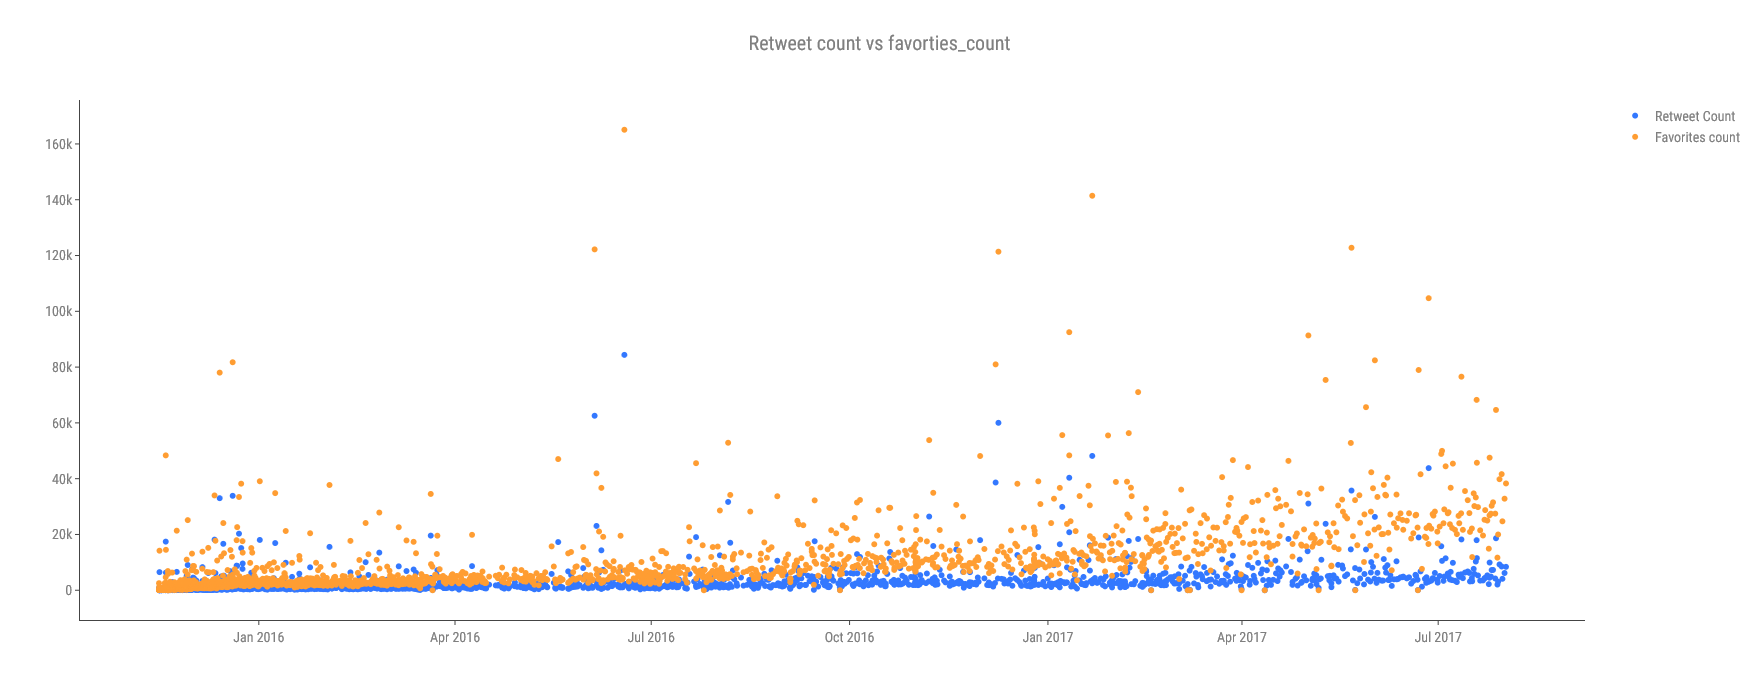

In [204]:
fig = go.Figure(data = data, layout=layout)
offline.iplot(fig)

### Regression Plot

In [207]:
slope, intercept, r_value, p_value, std_err = stats.linregress(master_df.retweets,master_df.favorites)
line = slope*master_df.retweets+intercept

In [ ]:
trace1 = go.Scatter(
    x = master_df.retweets,
    y = master_df.favorites,
    mode = 'markers',
    marker=go.Marker(color='rgb(255, 127, 14)'),
    name='Retweets vs Favorties'
)

trace2 = go.Scatter(
    x = master_df.retweets,
    y = line,
    marker=go.Marker(color='rgb(31, 119, 180)'),
    name='Fit'
)

layout = go.Layout(
                title='Regression Plot: Retweets vs Favorites',
                plot_bgcolor='rgb(229, 229, 229)',
                xaxis=go.XAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
                yaxis=go.YAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
                font=dict(family='Roboto Condensed', size=14, color='#7f7f7f'),
                width=1200,
                height=700, 
            )

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)

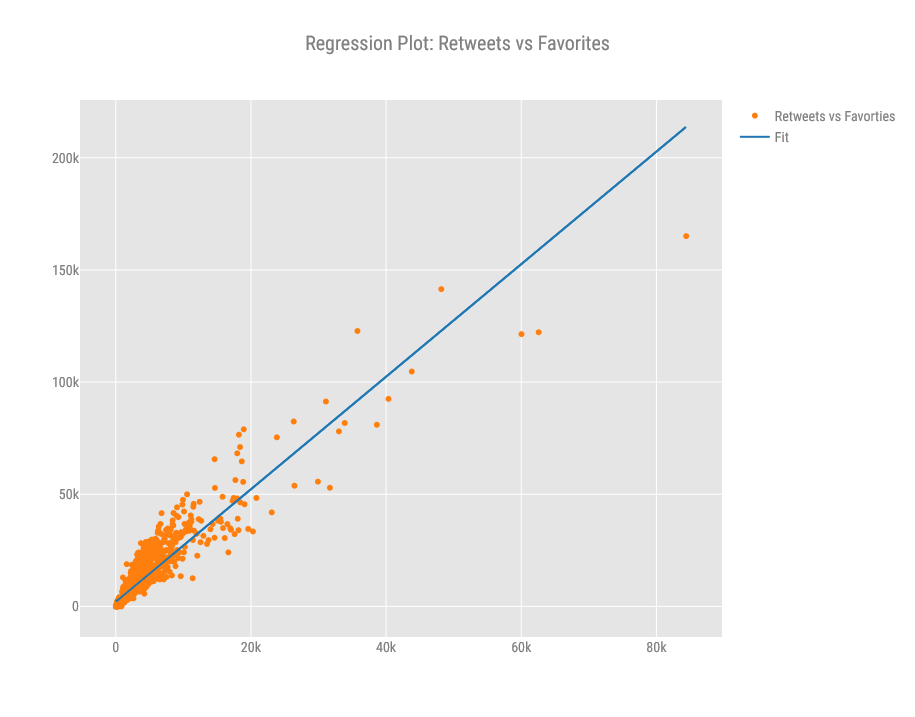

In [212]:
offline.iplot(fig)

#### Most retweeted and favortied post

In [216]:
master_df.loc[master_df.retweets == master_df.retweets.max()]

,tweet_id,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,predictions,conf,retweets,favorites,date_time,rating
784,744234799360020481,13.0,10.0,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,84397,165088,2016-06-18 18:26:18,1.3


<img src="highestrt.jpg">

### Highest Rated Post

In [218]:
master_df.loc[master_df.rating == master_df.rating.max()]

,tweet_id,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,predictions,conf,retweets,favorites,date_time,rating
735,749981277374128128,1776.0,10.0,Atticus,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,NaN,0.0,2658,5430,2016-07-04 15:00:45,177.6


<img src="highestrated.jpg">

In [220]:
master_df.loc[master_df.retweets == master_df.retweets.min()]

,tweet_id,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,predictions,conf,retweets,favorites,date_time,rating
1988,666102155909144576,11.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English_setter,0.298617,12,80,2015-11-16 03:55:04,1.1


In [221]:
master_df.loc[master_df.rating == master_df.rating.min()]

,tweet_id,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,predictions,conf,retweets,favorites,date_time,rating
242,835152434251116546,0.0,10.0,NaN,NaN,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,American_Staffordshire_terrier,0.012731,3271,23749,2017-02-24 15:40:31,0.0
765,746906459439529985,0.0,10.0,NaN,NaN,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,1,NaN,0.000000,323,3058,2016-06-26 03:22:31,0.0


Both the low ratings are not for the dog itself. One is for another twitter page plagiarising weratedogs's content, and other is a pictire of a building.

<img src="Capture2.jpg"> <img src="Capture1.jpg"> 